In [ ]:
%matplotlib inline


# Introduction

In this section, we will briefly explain what is
:term:`functional data analysis (FDA) <FDA>`, and we will introduce
scikit-fda, a library that provides FDA tools to staticians, engineers or
machine learning practicioners in the Python scientific ecosystem.

.. Disable isort
    isort:skip_file


In [ ]:
# Author: Carlos Ramos Carreño
# License: MIT

## What is functional data analysis?

Traditional multivariate statistics focus on the simultaneous analysis of
a finite number of variables. In this setting, we have several observations,
each of them consisting on a vector of measured values. The variables, or
coordinates of this vector, could be correlated, but otherwise they can be
arbitrarily ordered inside the observed vector, provided that the order is
the same for each observation. Usually these observations are considered
to be instances of a random vector, and a big part of the analysis is
centered in finding the distribution associated with it.

In contrast, in functional data analysis each observation is a function of
one or several variables, such as curves or surfaces. These functions are
usually continuous and often they are smooth, and derivatives can be
computed. The number of variables of these objects is then infinite, as each
evaluation of the function at one point could be considered as one variable.
Moreover, now it is not possible to reorder the variables of the
observations without altering substantially its structure. If the functions
are continuous, nearby variables are highly correlated, a characteristic
that makes some classical multivariate methods unsuitable to work with this
data.

In this setting, observations can also be considered to be instances
of a "functional random variable", usually called a stochastic process or
a random field. However, some of the concepts that proved very useful to
analyze multivariate data, such as density functions, are not applicable
to :term:`functional data`, while new tools, such as taking derivatives,
become available.

As such, functional data can benefit of a separate analysis from
multivariate statistics, but also adapting and extending multivariate
techniques when possible.



## What is scikit-fda?

scikit-fda is a Python library containing classes and functions that allow
you to perform functional data analysis tasks. Using it you can:

    - Represent functions as Python objects, both in a discretized fashion
      and as a basis expansion.
    - Apply preprocessing methods to functional data, including smoothing,
      registration and dimensionality reduction.
    - Perform a complete exploratory analysis of the data, summarizing its
      main properties, detecting possible outliers and visualizing the data
      in several ways.
    - Apply statistical inference tools developed for functional data, such
      as functional ANOVA.
    - Perform usual machine learning tasks, such as classification,
      regression or clustering, using functional observations.
    - Combine the tools offered by scikit-fda with other tools of the Python
      scientific ecosystem, such as those provided by the popular machine
      learning library [scikit-learn](https://scikit-learn.org/).



## Anatomy of a function

We would like to briefly remind the reader the basic concepts that are
employed to talk about functions. Functions in math are a relation between
two sets, the :term:`domain` and the :term:`codomain` in which each element
of the :term:`domain` is restricted to be related to exactly one element of
the :term:`codomain`. The intuition behind this is that a function
represents some type of deterministic process, that takes elements of the
:term:`domain` as inputs and produces elements of the :term:`codomain` as
outputs.

In :term:`FDA`, the inputs or parameters of a function are assumed to be
continuous parameters, and so are the outputs, or values of the function.
Thus, it is usual to restrict our functional observations to be functions
$\{x_i: \mathcal{T} \subseteq \mathbb{R}^p \to \mathbb{R}^q\}_{i=1}^N$.
In this case both the domain and codomain are (subsets of) vector spaces of
real numbers, and one could talk of the dimension of each of them as a
vector space (in this case the domain dimension is $p$ and the
codomain dimension is $q$).

The most common case of functional observation, and the one that has
received more attention in the functional data literature, is the case of
functions
$\{x_i: \mathcal{T} \subseteq \mathbb{R} \to \mathbb{R}\}_{i=1}^N$
(curves or trajectories).



As an example, the following code shows the Berkeley Growth dataset, one
of the classical datasets used in :term:`FDA`. The curves are heights of
93 boys and girls measured at several points since their birth to
their 18th birthday. Here the domain $\mathcal{T}$ is the interval
$[0, 18]$ and both the domain and codomain have a dimension of one.



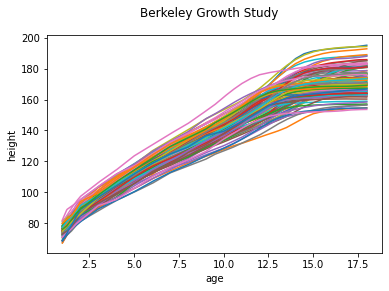

In [1]:
import skfda
import matplotlib.pyplot as plt

X, y = skfda.datasets.fetch_growth(return_X_y=True)

X.plot()
plt.show()

Functions where the domain dimension is greater than one (
such as surfaces or higher dimensional objects) are referred to as functions
of several variables. Functions where the codomain dimension is greater than
one are called vector-valued functions.



As an example we show another popular dataset: Canadian Weather. Here each
observation correspond to data taken from a different weather station in
Canada. For each day of the year we have two values: the average temperature
at that day among several years and the average precipitation among the same
years. Thus, here the domain $\mathcal{T}$ is the interval
$[0, 365)$, the domain dimension is one and the codomain dimension
is two. We can see that by default each coordinate of the values of the
function is plotted as a separate coordinate function.



In [ ]:
X, y = skfda.datasets.fetch_weather(return_X_y=True)

X.plot()
plt.show()